### Science

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
m, h, E, psi, dpsi = 1, 1, 5, 0, 1

In [ ]:
a = 1

In [ ]:
x = 0

In [ ]:
dx = a / 1000

In [ ]:
V = 0

In [ ]:
x_list = []
psi_list = []

In [ ]:
while x <= a:
    ddpsi = (2*m/h**2)*(V-E)*psi
    dpsi = dpsi + dx*ddpsi
    psi = psi + dx*dpsi
    x += dx
    
    x_list.append(x)
    psi_list.append(psi)

[<matplotlib.lines.Line2D>]

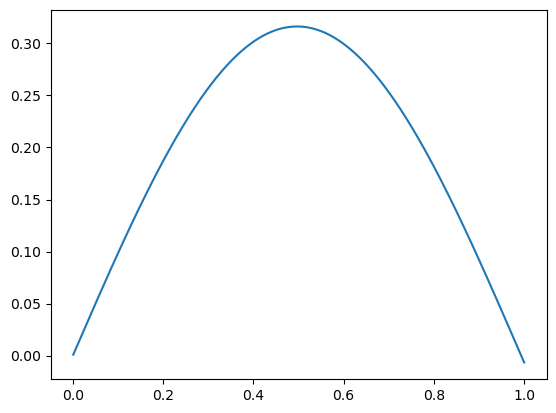

In [ ]:
plt.plot(x_list, psi_list)

In [ ]:
molecular, empir

In [ ]:
#!/bin/bash

In [ ]:
from typing import overload, List

In [ ]:
@overload
def getitem(x: str) -> str:
    pass

In [ ]:
@overload
def getitem(x: List[int]) -> int:
    pass

In [ ]:
from typing import TypedDict

In [ ]:
class NutritionInformation(TypedDict):
    value: int
    unit: str

In [ ]:
class RecipeNutritionInformation(TypedDict):
    recipes_used: int
    calories: NutritionInformation
    carbs: NutritionInformation

### AI

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

In [ ]:
torch.randperm(9)

tensor([8, 1, 2, 6, 5, 7, 4, 0, 3])

In [ ]:
def compute_ratio(current, prev):
    return current / prev

In [ ]:
torch.amax(x, dim=1)

In [ ]:
l1.register_forward_pass(add_visualize)

In [ ]:
nn.Parameter()

In [ ]:
from einops import repeat

In [ ]:
output = repeat(x, "h w -> h w new_axis", new_axis=2)

In [ ]:
tokenizer.decode(input_ids)

In [ ]:
from transformers import Trainer

In [ ]:
class DistillationTrainer(Trainer):
    def __init__(self, teacher_model):
        super().__init__()
        self.teacher_model = teacher_model
        self.loss_func = nn.CrossEntropyLoss()
    
    def forward(self, model, inputs, return_outputs=False):
        student_output = model(**inputs)
        student_logits = student_output.logits
        loss_ce = student_output.loss
        
        with torch.no_grad():
            teacher_logits = self.teacher_model(**inputs).logits
        
        temperature = self.args.temperature
        alpha = self.args.alpha
                
        loss_kd = temperature**2*F.kl_div(
            input=F.log_softmax(student_logits),
            target=F.softmax(teacher_logits)
        )
        
        loss = alpha*loss_ce + (1-alpha)*loss_kd

In [ ]:
import math

In [ ]:
class SelfAttention(nn.Module):
    def __init__(self, d_head):
        super().__init__()
        self.d_head = d_head
    
    def forward(self, q, k, v):
        qk_matmul = torch.matmul(q, k.T)
        scores = qk_matmul / math.sqrt(self.d_head)
        attention_weights = F.softmax(scores, dim=-1)
        
        output = torch.matmul(attention_weights, v)
        
        return output, attention_weights

In [ ]:
def compute_ratio(current, prev):
    return (current - prev).exp()

In [ ]:
import gymnasium as gym

In [ ]:
envs = gym.vector.SyncVectorEnv([
    lambda: gym.make("CartPole-v1"),
    lambda: gym.make("CartPole-v1"),
    lambda: gym.make("CartPole-v1")
])

In [ ]:
def normalize(x):
    return (x - x.mean())/x.std()

In [ ]:
with torch.no_grad():
    pass

In [ ]:
class LLMModel3(nn.Module):
    def __init__(self, vocab_sz, n_hidden):
        super().__init__()
        self.i_h = nn.Embedding(vocab_sz, n_hidden)
        self.h_h = nn.Linear(n_hidden, n_hidden)
        self.h_o = nn.Linear(n_hidden, vocab_sz)
        self.h = 0.
    
    def forward(self, x):
        for i in range(3):
            self.h = self.h + F.relu(self.i_h(x[i, :]))
            self.h = F.relu(self.h_h(x[i, :]))
        
        return self.h_o(self.h)